<a href="https://colab.research.google.com/github/temmyzeus/Tensorflow-Courses/blob/master/DeepLearning.AI%20TensorFlow%20Developer%20Professional%20Certificate/Natural%20Language%20Processing%20with%20Tensorflow/IMDB_Subwords8k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [2]:
imdb, info = tfds.load(
    'imdb_reviews/subwords8k',
    with_info=True,
    as_supervised=True
)

In [3]:
train = imdb['train']
test = imdb['test']
# Get Subword Text Encoder
tokenizer = info.features['text'].encoder

In [4]:
# convert sample_tokens to text
sample_text = 'I\'m going to be a very good ML Engineer'
sample_tokens = tokenizer.encode(sample_text)

print(tokenizer.encode(sample_text), end='\n\n')
print(tokenizer.decode(sample_tokens))

[8002, 7968, 111, 215, 7, 35, 4, 67, 74, 8006, 3780, 1844, 1004, 1225, 8043]

I'm going to be a very good ML Engineer


Min Len : 11
Max Len:  3944
Median Len 253.0


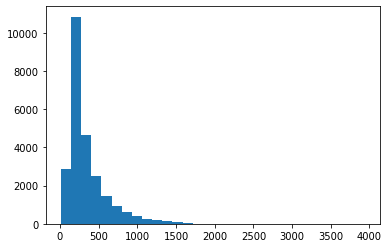

In [5]:
# Getting an Idea of teh distribution of token lengths
train_lens = np.array([len(_[0]) for _ in train])
print('Min Len :', np.min(train_lens))
print('Max Len: ', np.max(train_lens))
# Getting a good sense of the middle point, median seems better here
print('Median Len', np.median(train_lens))
plt.hist(train_lens, bins=30)
plt.show()

In [15]:
vocab_size = tokenizer.vocab_size
output_dim = 20
input_length = 500
BATCH_SIZE = 64
BUFFER_SIZE = 10000

In [61]:
train_padded = train.padded_batch(
    batch_size=BATCH_SIZE,
    padded_shapes=tf.compat.v1.data.get_output_shapes(train)
)

test_padded = test.padded_batch(
    batch_size=BATCH_SIZE,
    padded_shapes=tf.compat.v1.data.get_output_shapes(test)
)

In [40]:
train_ds = train.shuffle(buffer_size=BUFFER_SIZE)
train_ds.padded_batch

<bound method DatasetV2.padded_batch of <ShuffleDataset shapes: ((None,), ()), types: (tf.int64, tf.int64)>>

In [9]:
model = Seqeuntial([
    Embedding(input_dim=vocab_size, output_dim=output_dim, input_dim=input_length) ,
    GlobalAveragePooling1D(),
    Dense(),
    Dense()
], name='IMDB CLassifier')

SyntaxError: ignored